In [52]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)





/kaggle/input/migrationdata/MIG_08052024182834827.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

# Cargar el archivo CSV
dtype_dict = {'Flag Codes': str, 'Flags': str}
file_path = "./DataSets/MIG_08052024182834827.csv"  
data = pd.read_csv(file_path, dtype=dtype_dict)

data.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN


Forma del DataFrame: (464640, 13)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464640 entries, 0 to 464639
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           464640 non-null  object 
 1   Country of birth/nationality  464640 non-null  object 
 2   VAR                           464640 non-null  object 
 3   Variable                      464640 non-null  object 
 4   GEN                           464640 non-null  object 
 5   Gender                        464640 non-null  object 
 6   COU                           464640 non-null  object 
 7   Country                       464640 non-null  object 
 8   YEA                           464640 non-null  int64  
 9   Year                          464640 non-null  int64  
 10  Value                         464637 non-null  float64
 11  Flag Codes                    3 non-null  

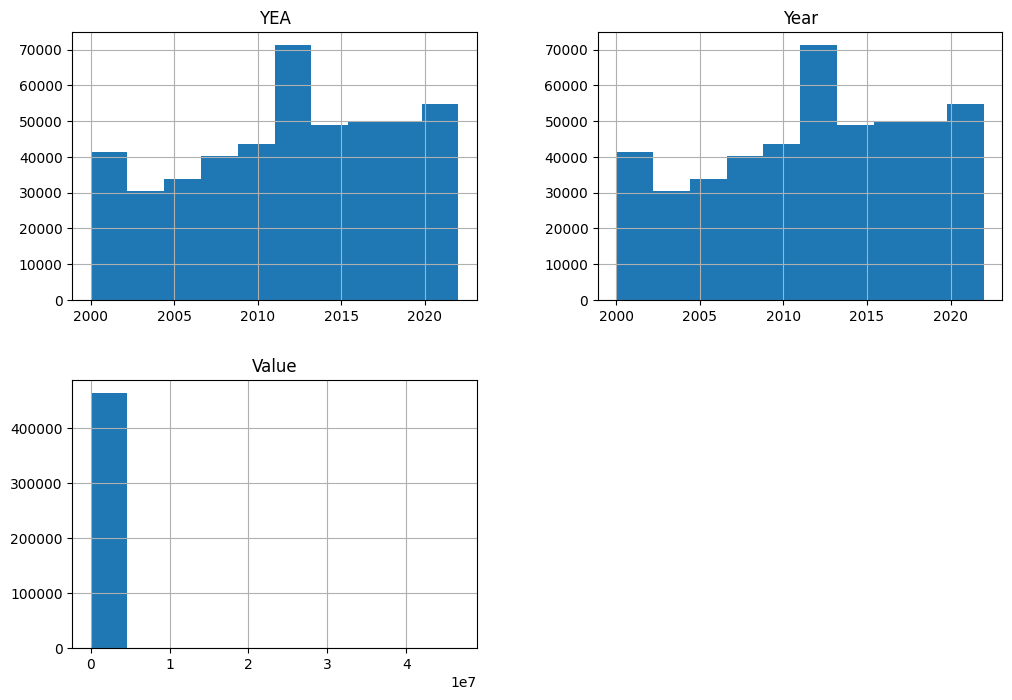

In [54]:
# Verificar la forma y estructura de los datos
print("Forma del DataFrame:", data.shape)
print("\nInformación del DataFrame:")
print(data.info())

# Comprobar si hay valores nulos o faltantes
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Resumir estadísticas descriptivas de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(data.describe())

# Explorar las distribuciones de las variables
data.hist(figsize=(12, 8))
plt.show()


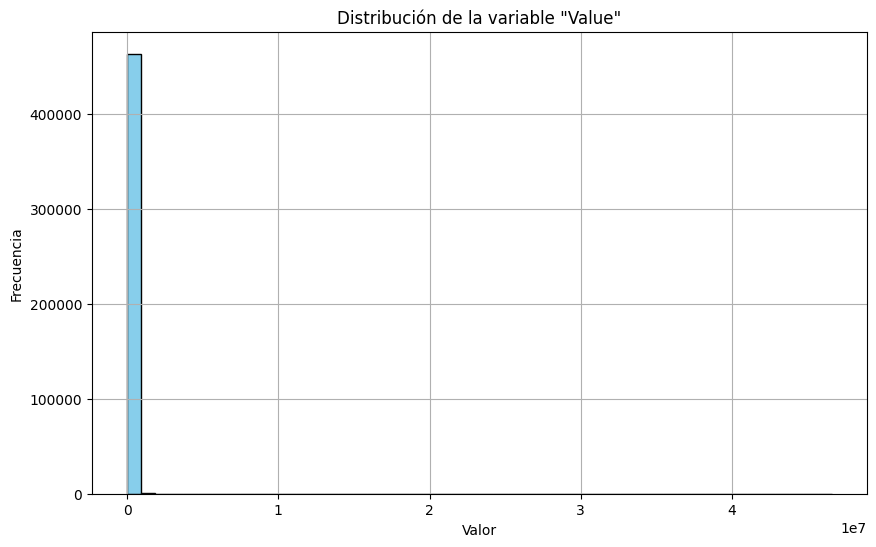


Distribución de la variable 'CO2':
CO2
TOT    3216
ROU    2751
DEU    2748
POL    2736
CHN    2726
       ... 
PRI    1413
NIU    1369
GUM    1356
TKL    1292
NS     1207
Name: count, Length: 210, dtype: int64

Distribución de la variable 'Country of birth/nationality':
Country of birth/nationality
Total          3216
Romania        2751
Germany        2748
Poland         2736
China          2726
               ... 
Puerto Rico    1413
Niue           1369
Guam           1356
Tokelau        1292
Not stated     1207
Name: count, Length: 210, dtype: int64

Distribución de la variable 'VAR':
VAR
B11    112536
B16    103674
B15     89550
B12     80781
B14     78096
Name: count, dtype: int64

Distribución de la variable 'Variable':
Variable
Inflows of foreign population by nationality                   112536
Acquisition of nationality by country of former nationality    103674
Stock of foreign population by nationality                      89550
Outflows of foreign population by nationalit

In [55]:
# 1. Tratar los valores nulos en la columna 'Value'
data.dropna(subset=['Value'], inplace=True)

# 2. Eliminar las columnas 'Flag Codes' y 'Flags'
data.drop(['Flag Codes', 'Flags'], axis=1, inplace=True)

# 3. Visualizar la distribución de la variable 'Value' mediante un histograma
plt.figure(figsize=(10, 6))
plt.hist(data['Value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable "Value"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 4. Explorar la distribución de algunas variables categóricas
categorical_columns = ['CO2', 'Country of birth/nationality', 'VAR', 'Variable', 'GEN', 'Gender', 'COU', 'Country']
for col in categorical_columns:
    print(f"\nDistribución de la variable '{col}':")
    print(data[col].value_counts())


In [56]:
data.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0


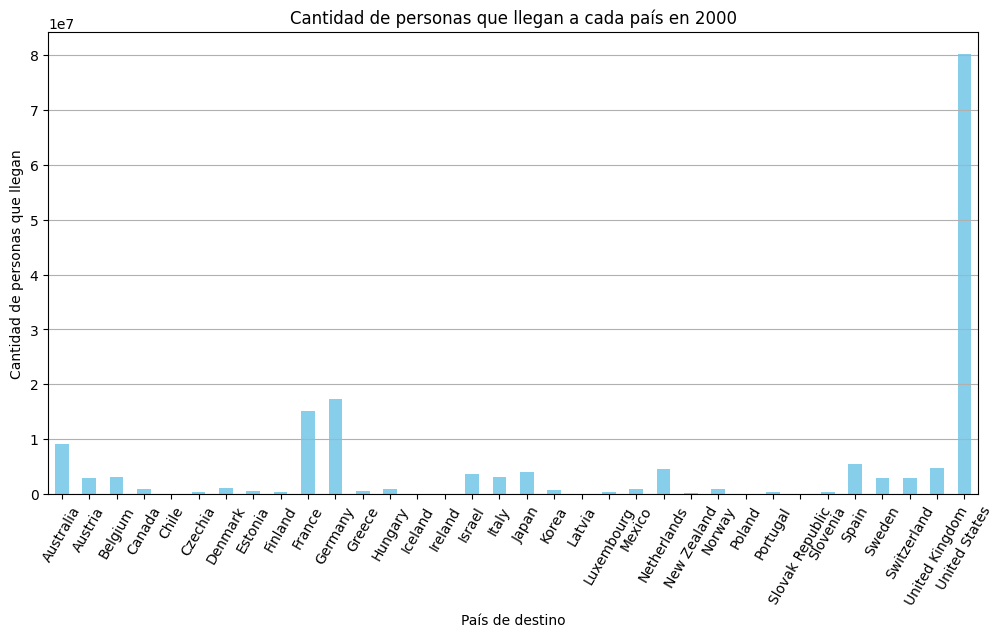

In [57]:
import plotly.graph_objects as go

In [63]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


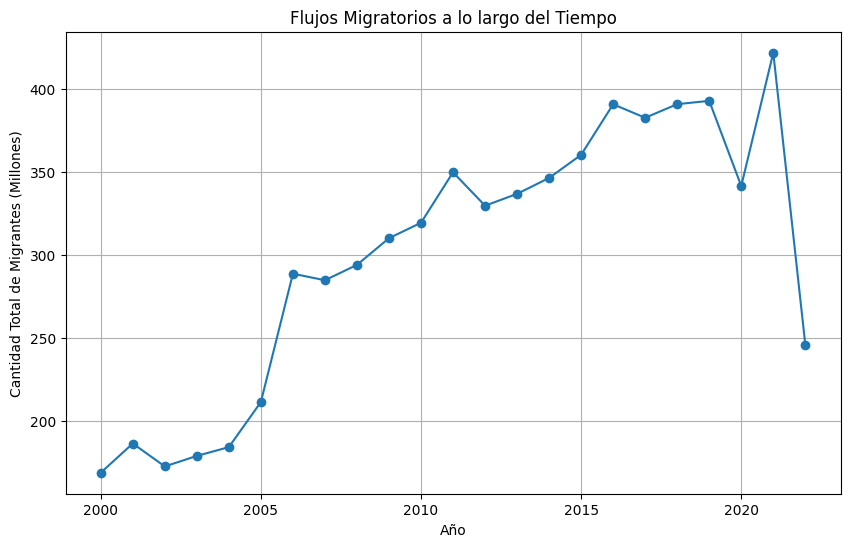

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los datos por año y sumar la cantidad total de migrantes para cada año
migrantes_por_año = data.groupby('YEA')['Value'].sum()

# Dividir los valores por un millón para obtener valores en millones
migrantes_por_año_millones = migrantes_por_año / 1000000

# Crear la gráfica de tendencias temporales con valores en millones
plt.figure(figsize=(10, 6))
plt.plot(migrantes_por_año_millones.index, migrantes_por_año_millones.values, marker='o', linestyle='-')
plt.title('Flujos Migratorios a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad Total de Migrantes (Millones)')
plt.grid(True)
plt.show()

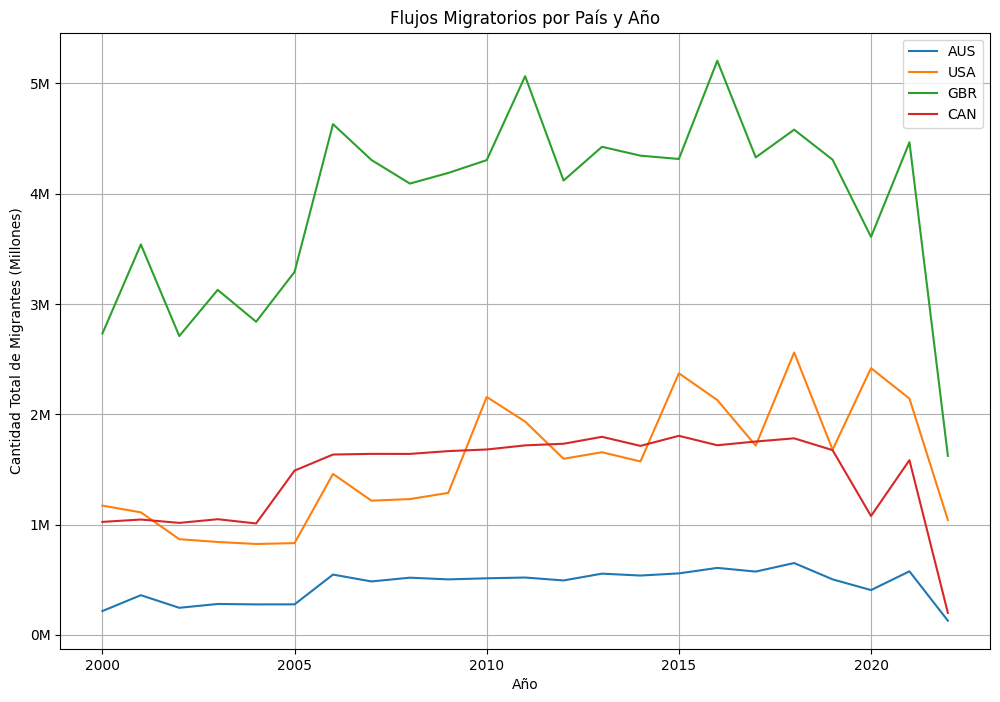

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Agrupar los datos por país y año y sumar la cantidad total de migrantes para cada combinación país-año
migrantes_por_pais_y_año = data.groupby(['CO2', 'YEA'])['Value'].sum()

# Seleccionar algunos países para visualizar
paises_a_visualizar = ['AUS', 'USA', 'GBR', 'CAN']  # Puedes ajustar esta lista según tus necesidades

# Crear un gráfico para cada país
plt.figure(figsize=(12, 8))
for pais in paises_a_visualizar:
    migrantes_por_año = migrantes_por_pais_y_año.loc[pais]
    
    # Dividir los valores por un millón para obtener valores en millones
    migrantes_por_año_millones = migrantes_por_año / 1000000
    
    plt.plot(migrantes_por_año.index, migrantes_por_año_millones.values, label=pais)

# Configurar el formato del eje Y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}M'.format(x)))

# Configurar el gráfico
plt.title('Flujos Migratorios por País y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad Total de Migrantes (Millones)')
plt.legend()
plt.grid(True)
plt.show()

In [88]:

# Agrupar los datos por país y año y sumar la cantidad total de migrantes que llegan y se van para cada combinación país-año
migrantes_por_pais_y_año = data.groupby(['CO2', 'YEA'])['Value'].sum()
migrantes_por_pais_y_año_arrival = data.groupby(['Country', 'YEA'])['Value'].sum()

# Separar los datos en migrantes que llegan y migrantes que se van
migrantes_que_llegan = migrantes_por_pais_y_año[migrantes_por_pais_y_año > 0]
migrantes_que_se_van = migrantes_por_pais_y_año[migrantes_por_pais_y_año < 0]

# Encontrar los países con más personas que llegan y se van por año
paises_con_mas_llegadas_por_año = migrantes_que_llegan.groupby('YEA').idxmax()
migrantes_por_pais_y_año_arrival = migrantes_que_se_van.groupby('YEA').idxmax()

# Imprimir los resultados
print("Países con más personas que llegan por año:")
print(paises_con_mas_llegadas_por_año)
print("\nPaíses con más personas que se van por año:")
print(paises_con_mas_salidas_por_año)

Países con más personas que llegan por año:
YEA
2000    (TOT, 2000)
2001    (TOT, 2001)
2002    (TOT, 2002)
2003    (TOT, 2003)
2004    (TOT, 2004)
2005    (TOT, 2005)
2006    (TOT, 2006)
2007    (TOT, 2007)
2008    (TOT, 2008)
2009    (TOT, 2009)
2010    (TOT, 2010)
2011    (TOT, 2011)
2012    (TOT, 2012)
2013    (TOT, 2013)
2014    (TOT, 2014)
2015    (TOT, 2015)
2016    (TOT, 2016)
2017    (TOT, 2017)
2018    (TOT, 2018)
2019    (TOT, 2019)
2020    (TOT, 2020)
2021    (TOT, 2021)
2022    (TOT, 2022)
Name: Value, dtype: object

Países con más personas que se van por año:
Series([], Name: Value, dtype: object)


In [1]:
!pip install pandas matplotlib seaborn scikit-learn tqdm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


NameError: name 'le' is not defined

/tmp/ipykernel_13/3974865001.py:16: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Primeras filas del dataset:
   CO2 Country of birth/nationality  VAR  \
0  AFG                  Afghanistan  B11   
1  AFG                  Afghanistan  B11   
2  AFG                  Afghanistan  B11   
3  AFG                  Afghanistan  B11   
4  AFG                  Afghanistan  B11   

                                       Variable  GEN Gender  COU    Country  \
0  Inflows of foreign population by nationality  TOT  Total  AUS  Australia   
1  Inflows of foreign population by nationality  TOT  Total  AUS  Australia   
2  Inflows of foreign population by nationality  TOT  Total  AUS  Australia   
3  Inflows of foreign population by nationality  TOT  Total  AUS  Australia   
4  Inflows of foreign population by nationality  TOT  Total  AUS  Australia   

    YEA  Year   Value Flag Codes Flags  
0  2000  2000   887.0        NaN   NaN  
1  2001  2001   456.0        NaN   NaN  
2  2002  2002   660.0        NaN   NaN  
3  2003  2003  1015.0        NaN   NaN  
4  2004  2004  1340.0      

/tmp/ipykernel_13/3974865001.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_clean, x='Year', y='Value', ci=None)


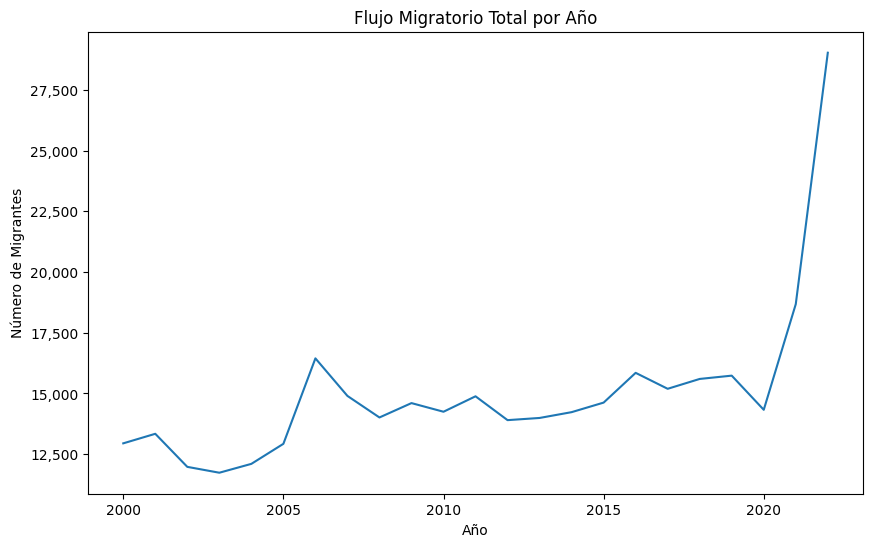

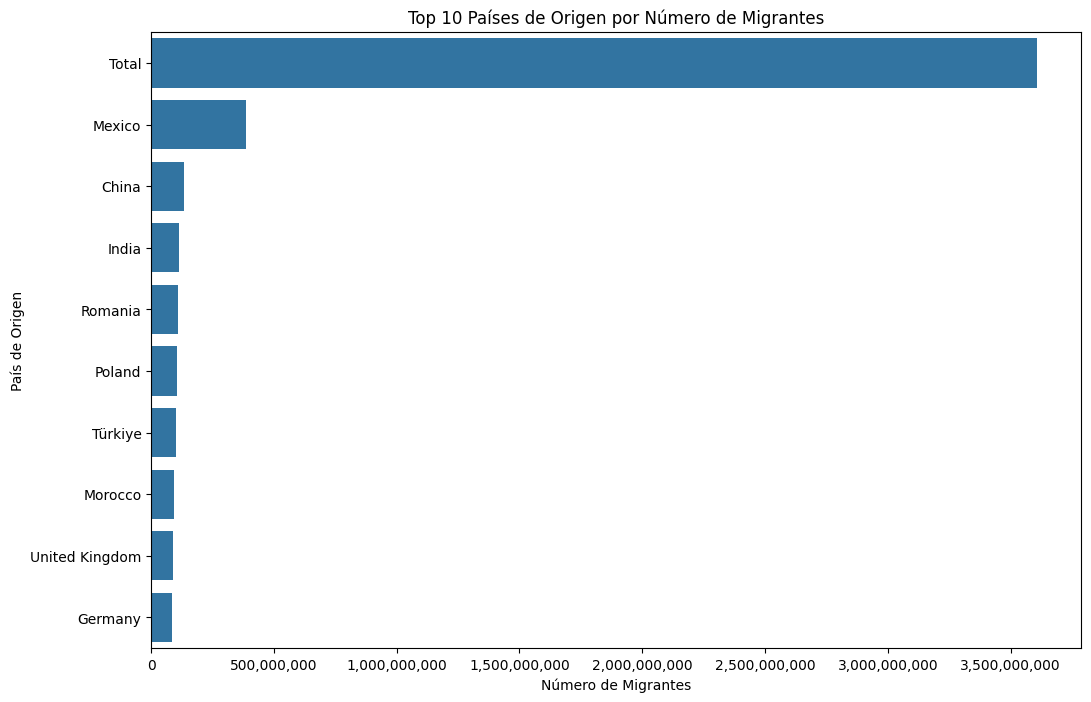

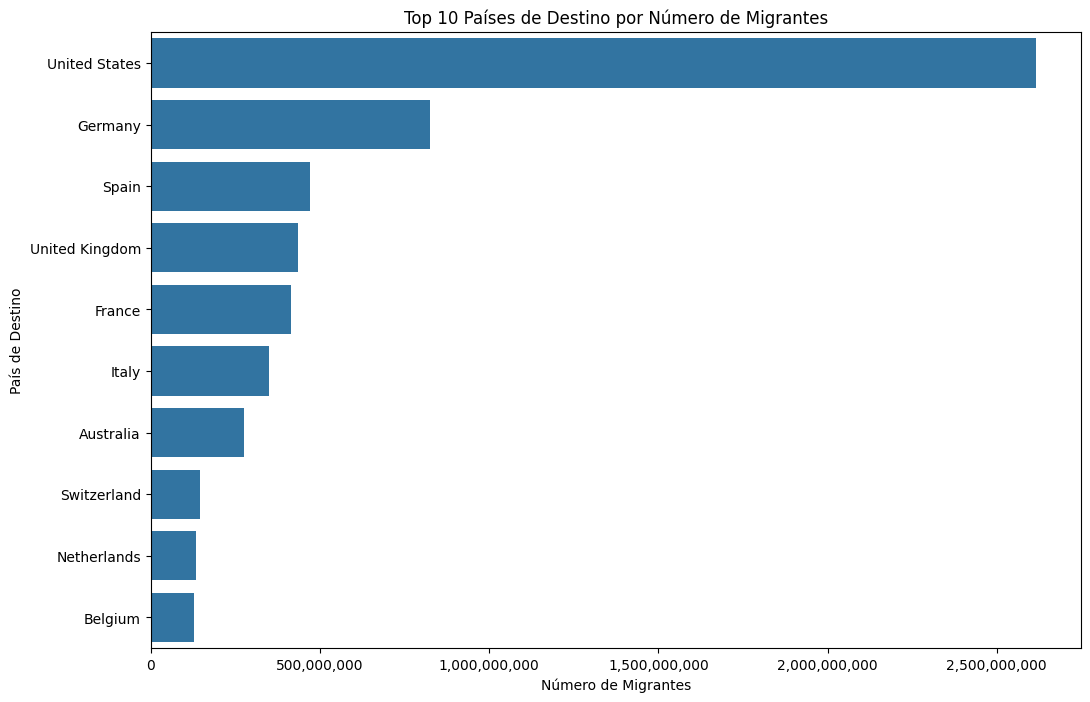

Estructura del dataframe después de la transformación:
    YEA  Year   Value  CO2_AFG  CO2_AGO  CO2_ALB  CO2_AND  CO2_ARE  CO2_ARG  \
0  2000  2000   887.0     True    False    False    False    False    False   
1  2001  2001   456.0     True    False    False    False    False    False   
2  2002  2002   660.0     True    False    False    False    False    False   
3  2003  2003  1015.0     True    False    False    False    False    False   
4  2004  2004  1340.0     True    False    False    False    False    False   

   CO2_ARM  ...  Country_Switzerland  Country_Türkiye  Country_United Kingdom  \
0    False  ...                False            False                   False   
1    False  ...                False            False                   False   
2    False  ...                False            False                   False   
3    False  ...                False            False                   False   
4    False  ...                False            False            

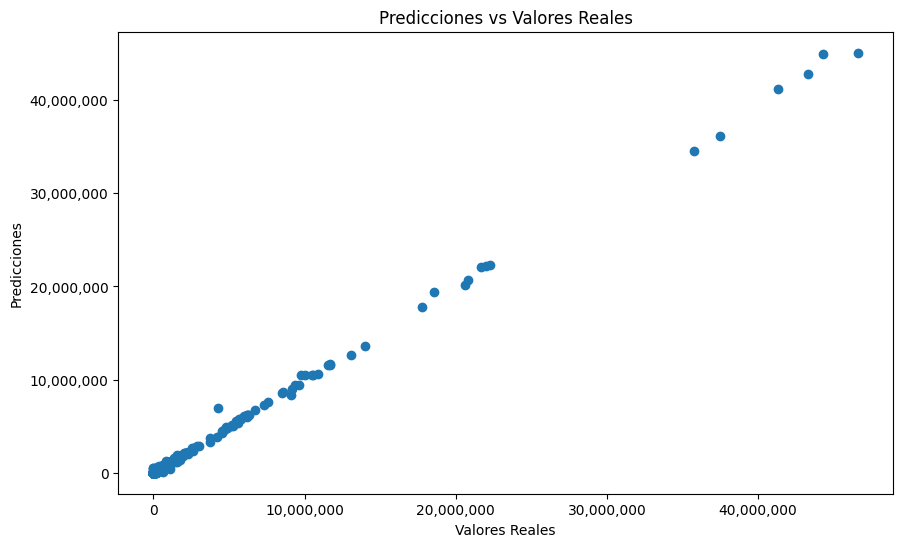

In [7]:


# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker
import numpy as np
from tqdm import tqdm

# ## 1. Carga de Datos
# Cargar los datos desde un archivo CSV (asegúrate de ajustar la ruta a tu archivo)
 # Reemplaza con la ruta correcta a tu archivo CSV
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# ## 2. Limpieza de Datos
# Eliminar columnas innecesarias
data_clean = data.drop(columns=['VAR', 'GEN', 'Flag Codes', 'Flags'])

# Eliminar filas con valores faltantes
data_clean = data_clean.dropna()

# Convertir el año a tipo entero
data_clean['Year'] = data_clean['Year'].astype(int)

# Mostrar información del dataframe limpio
print("Información del dataset limpio:")
print(data_clean.info())

# ## 3. Análisis Exploratorio de Datos (EDA)
# ### 3.1 Flujo Migratorio Total por Año
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_clean, x='Year', y='Value', ci=None)
plt.title('Flujo Migratorio Total por Año')
plt.xlabel('Año')
plt.ylabel('Número de Migrantes')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

# ### 3.2 Flujo Migratorio por País de Origen
top_origins = data_clean.groupby('Country of birth/nationality')['Value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_origins.values, y=top_origins.index)
plt.title('Top 10 Países de Origen por Número de Migrantes')
plt.xlabel('Número de Migrantes')
plt.ylabel('País de Origen')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

# ### 3.3 Flujo Migratorio por País de Destino
top_destinations = data_clean.groupby('Country')['Value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_destinations.values, y=top_destinations.index)
plt.title('Top 10 Países de Destino por Número de Migrantes')
plt.xlabel('Número de Migrantes')
plt.ylabel('País de Destino')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

# ## 4. Preparación de Datos para Machine Learning
# Convertir las variables categóricas a variables dummy
data_ml = pd.get_dummies(data_clean, columns=['CO2', 'Country of birth/nationality', 'COU', 'Country', 'Variable', 'Gender'])

# Verificar la estructura del dataframe después de la transformación
print("Estructura del dataframe después de la transformación:")
print(data_ml.head())

# Definir las características (X) y la variable objetivo (y)
X = data_ml.drop(columns=['Value'])
y = data_ml['Value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ## 5. Modelado Predictivo
# Usar RandomForestRegressor para mejorar las predicciones
model = RandomForestRegressor(n_estimators=20, random_state=22)  # Reducir n_estimators a 50
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()


